# ChiCMaxima algorithm review

In [2]:
file="20copy.called_interactions.tsv"
df = read.table(file,sep="\t",header=T)
head(df)

,ID_Bait,chr_Bait,start_Bait,end_Bait,Bait_name,ID_OE,chr_OE,start_OE,end_OE,OE_name,N,predicted_value
,<int>,<chr>,<int>,<int>,<chr>,<int>,<chr>,<int>,<int>,<chr>,<dbl>,<dbl>
1,32626000,chr11,32626000,32626250,chr11_32625911_32625920_CCDC73,307165,chr11,31627500,31627750,chr11_31627500_31627750,1.382501,1.540992
2,32626000,chr11,32626000,32626250,chr11_32625911_32625920_CCDC73,307166,chr11,31627750,31628000,chr11_31627750_31628000,1.382501,1.540992
3,32626000,chr11,32626000,32626250,chr11_32625911_32625920_CCDC73,307167,chr11,31628000,31628250,chr11_31628000_31628250,1.382501,1.540992
4,32626000,chr11,32626000,32626250,chr11_32625911_32625920_CCDC73,307168,chr11,31628250,31628500,chr11_31628250_31628500,1.382501,1.540992
5,32626000,chr11,32626000,32626250,chr11_32625911_32625920_CCDC73,307169,chr11,31628500,31628750,chr11_31628500_31628750,1.382501,1.540992
6,32626000,chr11,32626000,32626250,chr11_32625911_32625920_CCDC73,307170,chr11,31628750,31629000,chr11_31628750_31629000,1.382501,1.540992


In [4]:
df2 = subset(df,Bait_name=="chr1_235493350_235493351_GGPS1")

In [5]:
head(df2)

,ID_Bait,chr_Bait,start_Bait,end_Bait,Bait_name,ID_OE,chr_OE,start_OE,end_OE,OE_name,N,predicted_value
,<int>,<chr>,<int>,<int>,<chr>,<int>,<chr>,<int>,<int>,<chr>,<dbl>,<dbl>
54355,235493500,chr1,235493500,235493750,chr1_235493350_235493351_GGPS1,167002,chr1,234493250,234493500,chr1_234493250_234493500,1.612917,1.212972
54356,235493500,chr1,235493500,235493750,chr1_235493350_235493351_GGPS1,167003,chr1,234493500,234493750,chr1_234493500_234493750,2.172501,1.212972
54357,235493500,chr1,235493500,235493750,chr1_235493350_235493351_GGPS1,167004,chr1,234493750,234494000,chr1_234493750_234494000,2.304168,1.212972
54358,235493500,chr1,235493500,235493750,chr1_235493350_235493351_GGPS1,167005,chr1,234494000,234494250,chr1_234494000_234494250,2.488501,1.212972
54359,235493500,chr1,235493500,235493750,chr1_235493350_235493351_GGPS1,167006,chr1,234494250,234494500,chr1_234494250_234494500,2.488501,1.212972
54360,235493500,chr1,235493500,235493750,chr1_235493350_235493351_GGPS1,167007,chr1,234494500,234494750,chr1_234494500_234494750,2.765001,1.212972


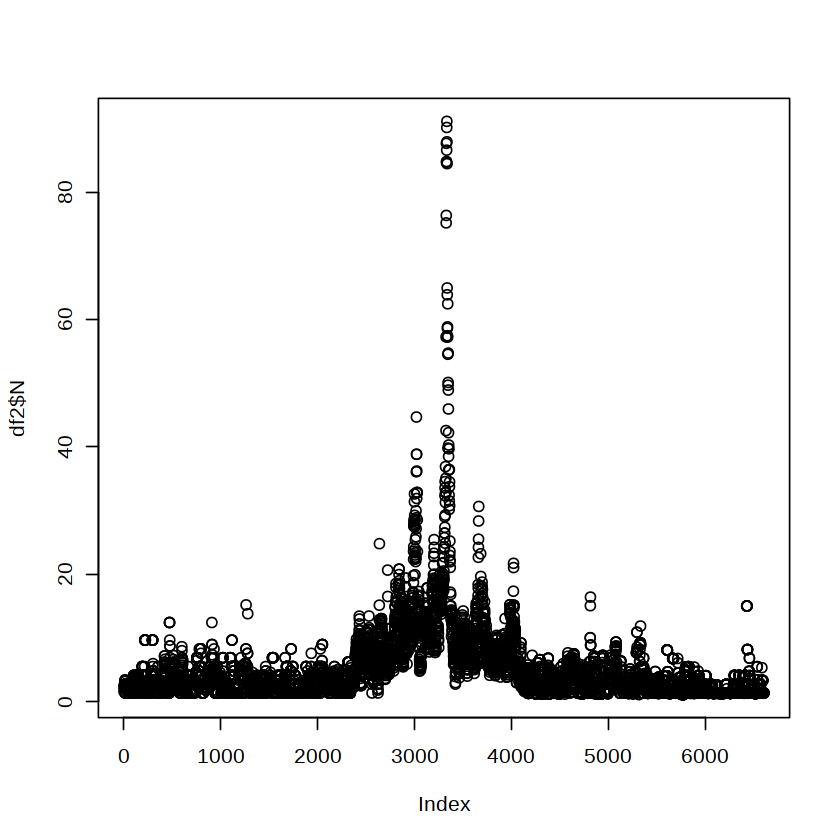

In [6]:
plot(df2$N)

In [10]:
y=df2[,"N"]
x=df2[,"start_OE"]
n <- length(y)
span=0.05
y.smooth <- loess(y ~ x, span=span)$fitted

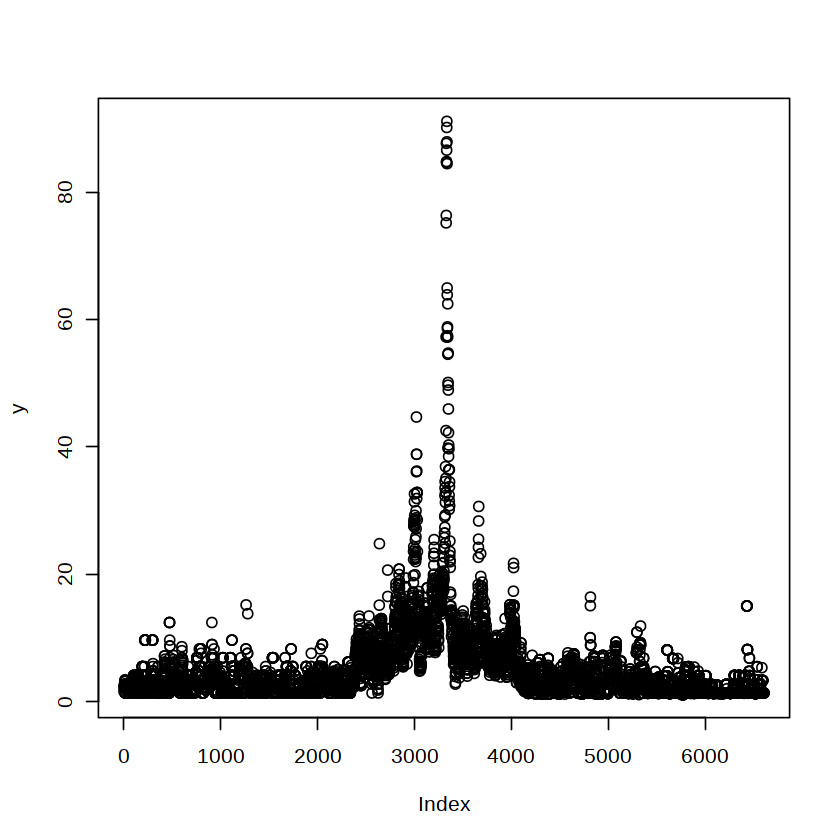

In [11]:
plot(y)

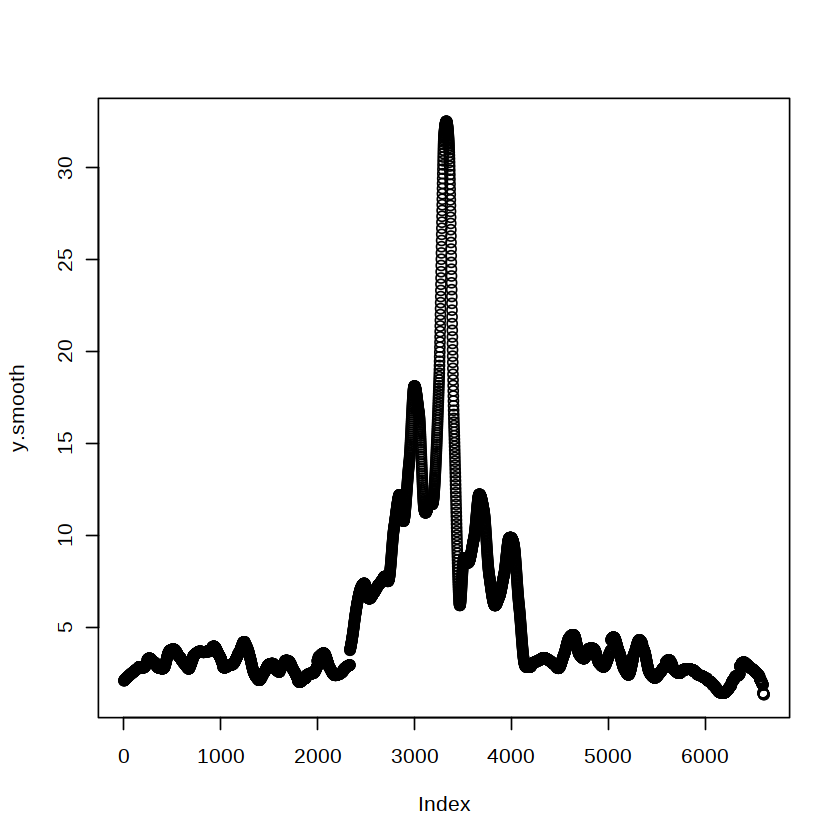

In [12]:
plot(y.smooth)

In [14]:
library(zoo)


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




In [16]:
w=30
y.max <- rollapply(zoo(y.smooth), 2*w+1,max,align="center")

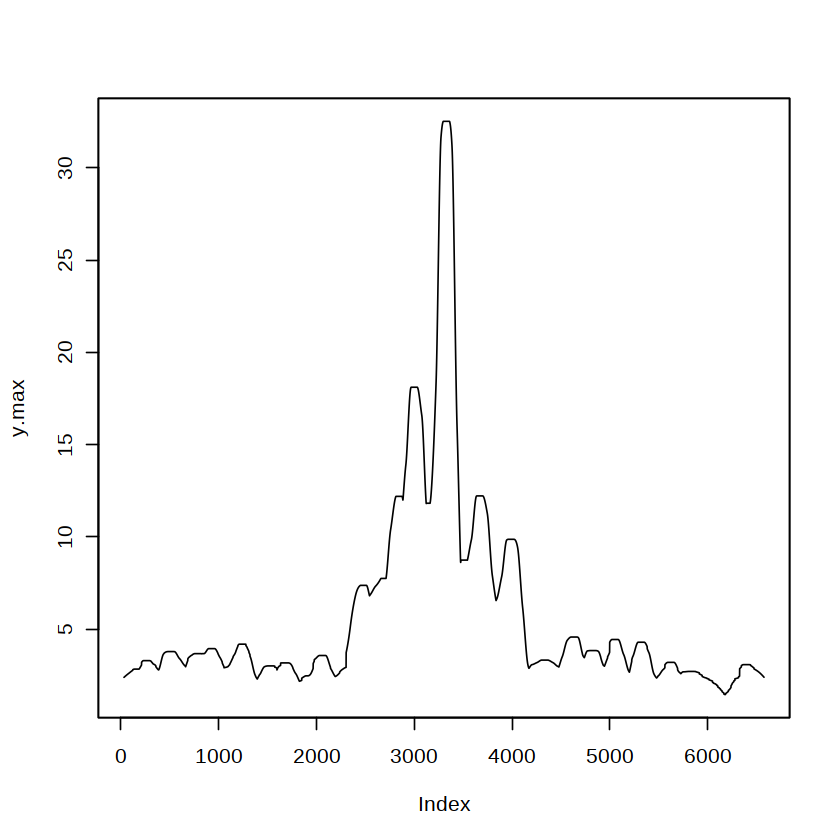

In [17]:
plot(y.max)

In [18]:
delta <- y.max - y.smooth[-c(1:w, n+1-1:w)]

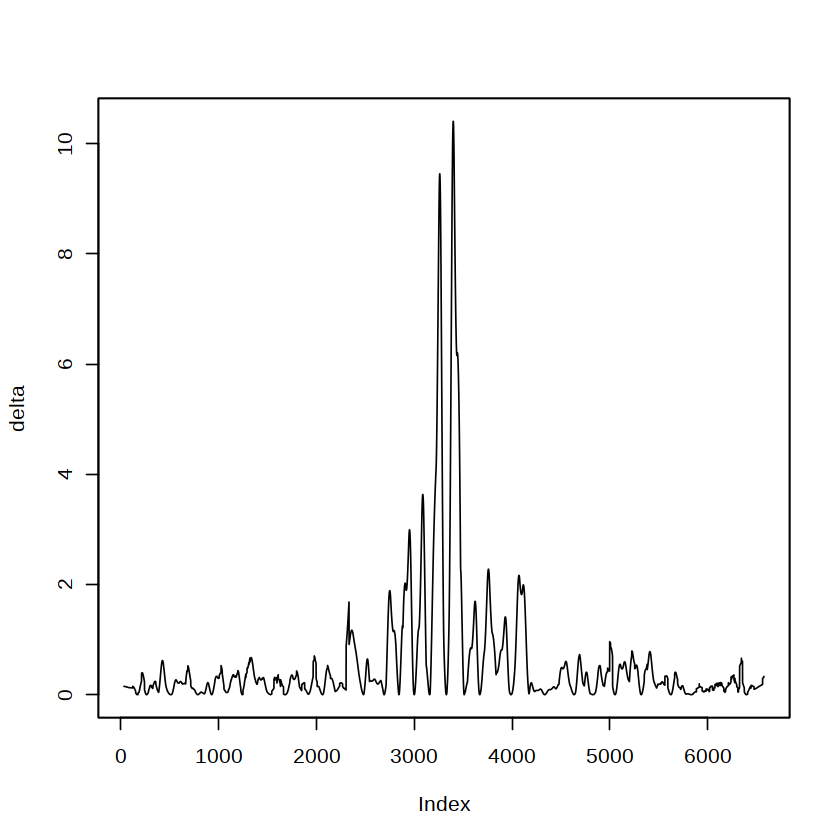

In [19]:
plot(delta)

In [20]:
d=0
i.max <- which(delta <= d) + w

In [29]:
?rollapply

rollapply {zoo},R Documentation
data,the data to be used (representing a series of observations).
width,"numeric vector or list. In the simplest case this is an integer specifying the window width (in numbers of observations) which is aligned to the original sample according to the align argument. Alternatively, width can be a list regarded as offsets compared to the current time, see below for details."
FUN,the function to be applied.
...,optional arguments to FUN.
by,calculate FUN at every by-th time point rather than every point. by is only used if width is length 1 and either a plain scalar or a list.
by.column,"logical. If TRUE, FUN is applied to each column separately."
fill,a three-component vector or list (recycled otherwise) providing filling values at the left/within/to the right of the data range. See the fill argument of na.fill for details.
na.pad,deprecated. Use fill = NA instead of na.pad = TRUE.
partial,"logical or numeric. If FALSE (default) then FUN is only applied when all indexes of the rolling window are within the observed time range. If TRUE, then the subset of indexes that are in range are passed to FUN. A numeric argument to partial can be used to determin the minimal window size for partial computations. See below for more details."
align,specifyies whether the index of the result should be left- or right-aligned or centered (default) compared to the rolling window of observations. This argument is only used if width represents widths.


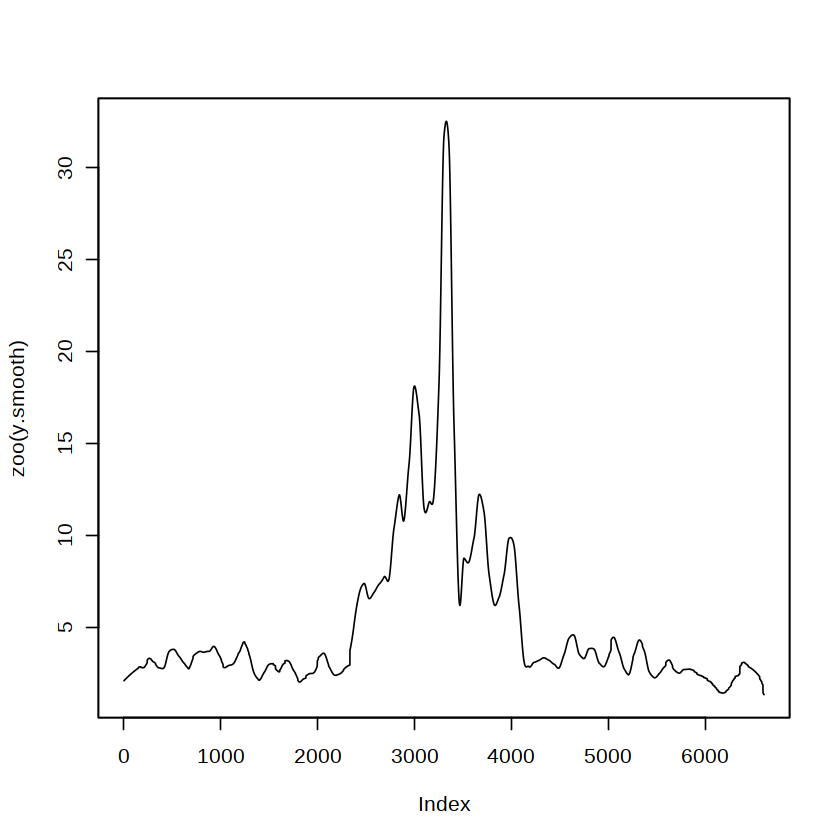

In [28]:
plot(zoo(y.smooth))

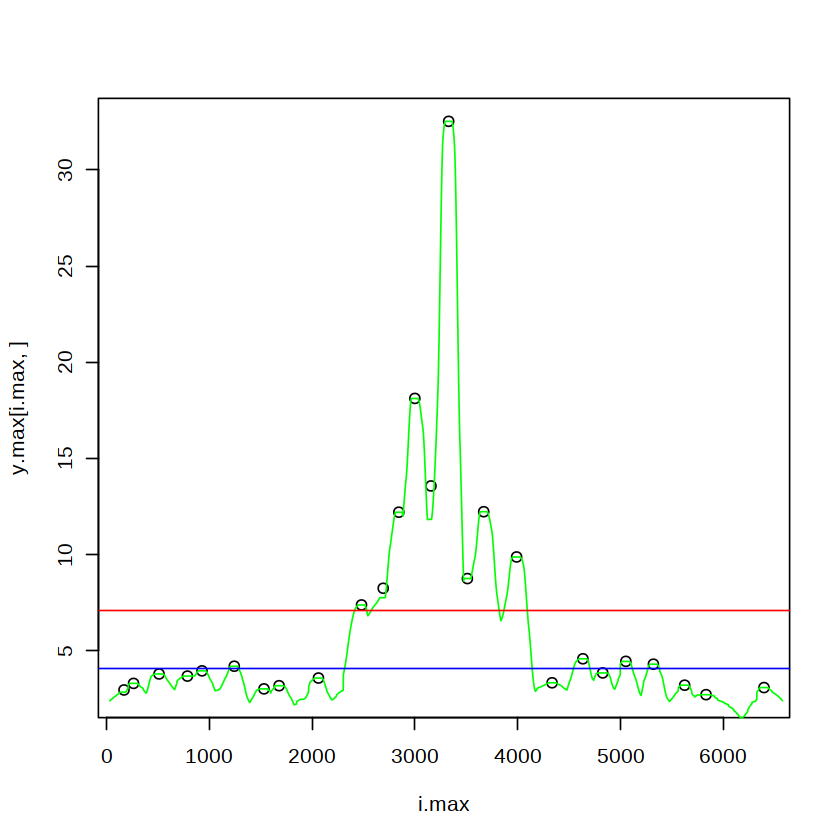

In [38]:
plot(x=i.max,y=y.max[i.max,])
lines(y.max,col="green")
abline(h=median(y.max[i.max,]),col="blue")
abline(h=mean(y.max[i.max,]),col="red")

In [37]:
?abline

abline {graphics},R Documentation
"a, b","the intercept and slope, single values."
untf,logical asking whether to untransform. See ‘Details’.
h,the y-value(s) for horizontal line(s).
v,the x-value(s) for vertical line(s).
coef,a vector of length two giving the intercept and slope.
reg,an object with a coef method. See ‘Details’.
...,"graphical parameters such as col, lty and lwd (possibly as vectors: see ‘Details’) and xpd and the line characteristics lend, ljoin and lmitre."
